In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")
# Set to display all the columns in dataset
pd.set_option("display.max_columns", None)
# Import psql to run queries 
import pandasql as psql

In [3]:
#load the dataset
bsdata=pd.read_csv(r"D:/Datasets/full_data.csv",header=0)
bsdata_bk=bsdata.copy()
bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
#retrieve the information
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
#finding the null values
bsdata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#finding duplicate values
bsdata_dup=bsdata[bsdata.duplicated(keep='last')]
bsdata_dup

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [11]:
#finding unique values
bsdata.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [13]:
#finding the shape of the dataset
bsdata.shape

(4981, 11)

In [15]:
# label encoder 
#the label encoder to handle the cateorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bsdata['gender']=LE.fit_transform(bsdata[['gender']])
bsdata['ever_married']=LE.fit_transform(bsdata[['ever_married']])
bsdata['work_type']=LE.fit_transform(bsdata[['work_type']])
bsdata['Residence_type']=LE.fit_transform(bsdata[['Residence_type']])
bsdata['smoking_status']=LE.fit_transform(bsdata[['smoking_status']])

In [16]:
bsdata['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [17]:
#count the target or dependent variable by '0' & '1' and their proportion
#(>=10:1,then the dataset is imbalance data)
stroke_count=bsdata.stroke.value_counts()
print('Class 0:',stroke_count[0])
print('Class 1:',stroke_count[1])
print('Proportion:',round(stroke_count[0]/stroke_count[1],2),':1')
print('Total Bank records:',len(bsdata))

Class 0: 4733
Class 1: 248
Proportion: 19.08 :1
Total Bank records: 4981


In [18]:
bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [23]:
bsdata.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [25]:
#Outlier 1
age_LL=round(bsdata.age.mean() - 3 * bsdata.age.std(),3)
age_UL=round(bsdata.age.mean() + 3 * bsdata.age.std(),3)
bsdata[(bsdata.age > age_UL) | (bsdata.age < age_LL)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [27]:
#Outlier 2
hd_LL=round(bsdata.heart_disease.mean() - 3 * bsdata.heart_disease.std(),3)
hd_UL=round(bsdata.heart_disease.mean() + 3 * bsdata.heart_disease.std(),3)
#bsdata[(bsdata.heart_disease > hd_UL) | (bsdata.heart_disease < hd_LL)]
bsdata_new = bsdata[(bsdata.heart_disease < hd_UL) & (bsdata.heart_disease > hd_LL)]
bsdata_bk = bsdata_new.copy()
bsdata_new.shape

(4706, 11)

In [29]:
#Outlier 3
wt_LL=round(bsdata_new.work_type.mean() - 3 * bsdata_new.work_type.std(),3)
wt_UL=round(bsdata_new.work_type.mean() + 3 * bsdata_new.work_type.std(),3)
bsdata_new[(bsdata_new.work_type > wt_UL) | (bsdata_new.work_type < wt_LL)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [31]:
#Outlier 4
agl_LL=round(bsdata_new.avg_glucose_level.mean() - 3 * bsdata_new.avg_glucose_level.std(),3)
agl_UL=round(bsdata_new.avg_glucose_level.mean() + 3 * bsdata_new.avg_glucose_level.std(),3)
#bsdata_new[(bsdata_new.avg_glucose_level > agl_UL) | (bsdata_new.avg_glucose_level < agl_LL)]
bsdata1 = bsdata_new[(bsdata_new.avg_glucose_level < agl_UL) & (bsdata_new.avg_glucose_level > agl_LL)]
bsdata_bk1 = bsdata1.copy()
bsdata1.shape

(4633, 11)

In [33]:
#Outlier 5
bmi_LL=round(bsdata1.bmi.mean() - 3 * bsdata1.bmi.std(),3)
bmi_UL=round(bsdata1.bmi.mean() + 3 * bsdata1.bmi.std(),3)
bsdata1[(bsdata1.bmi > bmi_UL) | (bsdata1.bmi < bmi_LL)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [35]:
#Outlier 6
ss_LL=round(bsdata1.smoking_status.mean() - 3 * bsdata1.smoking_status.std(),3)
ss_UL=round(bsdata1.smoking_status.mean() + 3 * bsdata1.smoking_status.std(),3)
bsdata1[(bsdata1.smoking_status > ss_UL) | (bsdata1.smoking_status < ss_LL)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [37]:
#seperating independent and dependent variables
IndepVar=[]
for col in bsdata1.columns:
    if col!='stroke':
        IndepVar.append(col)
TargetVar='stroke'
x=bsdata1[IndepVar]
y=bsdata1[TargetVar]

In [39]:
bsdata1.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           1
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3632
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [41]:
bsdata1.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2931,0,64.0,1,0,1,0,1,211.12,22.0,2,0
1101,0,33.0,0,0,1,1,1,79.91,33.5,2,0
1492,0,7.0,0,0,0,3,1,61.42,20.8,0,0
3257,1,27.0,0,0,0,1,0,112.41,33.7,2,0
321,1,44.0,0,0,1,1,0,74.91,37.5,2,0
2496,0,38.0,0,0,1,1,0,100.05,20.8,3,0
1006,1,41.0,0,0,1,1,0,92.49,41.6,0,0
3815,1,80.0,0,0,0,1,1,59.49,25.6,0,0
3478,1,71.0,0,0,1,0,0,99.76,33.4,1,0
3490,1,26.0,0,0,0,0,0,76.74,29.8,0,0


In [53]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB ? eta -:--:--
   ------------- ------------------------- 92.2/258.3 kB 751.6 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 751.6 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 655.8 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.3 kB 656.4 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.3 kB 656.4 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.3 kB 656.4 kB/s eta 0:00:01
   --------------------------------- ---- 225.3/258.3 kB 529.7 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 582.4 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 529.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(4996, 10)
(4996,)


In [55]:
#identifying the variables effecting target variable 
cols=['age','work_type','avg_glucose_level','bmi','smoking_status']

In [56]:
#splitting the data as train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3497, 10), (1499, 10), (3497,), (1499,))

In [57]:
#scaling techinique

from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)
x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

In [63]:
#to balance the dataset 
stroke_count = y_train.value_counts()
print("proportion: ",stroke_count[0]/stroke_count[1],":1")

proportion:  7.989717223650386 :1


# KNN Algorithm

In [27]:
#load the dataset to store KNN results
KNN_Results=pd.read_csv(r"D:\Datasets\KNN_Results.csv",header=0)
KNN_Results_bk=KNN_Results.copy()
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 147   19]
 [  70 1263]]
Outcome values : 
 147 19 70 1263
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.89      0.77       166
           0       0.99      0.95      0.97      1333

    accuracy                           0.94      1499
   macro avg       0.83      0.92      0.87      1499
weighted avg       0.95      0.94      0.94      1499

Accuracy : 94.1 %
Precision : 67.7 %
Recall : 88.6 %
F1 Score : 0.768
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 91.6 %
MCC : 0.743
roc_auc_score: 0.917


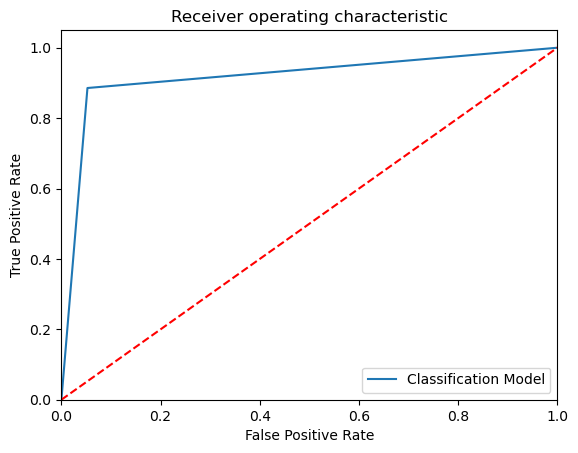

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 107   59]
 [  58 1275]]
Outcome values : 
 107 59 58 1275
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.64      0.65       166
           0       0.96      0.96      0.96      1333

    accuracy                           0.92      1499
   macro avg       0.80      0.80      0.80      1499
weighted avg       0.92      0.92      0.92      1499

Accuracy : 92.2 %
Precision : 64.8 %
Recall : 64.5 %
F1 Score : 0.647
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 80.0 %
MCC : 0.603
roc_auc_score: 0.801


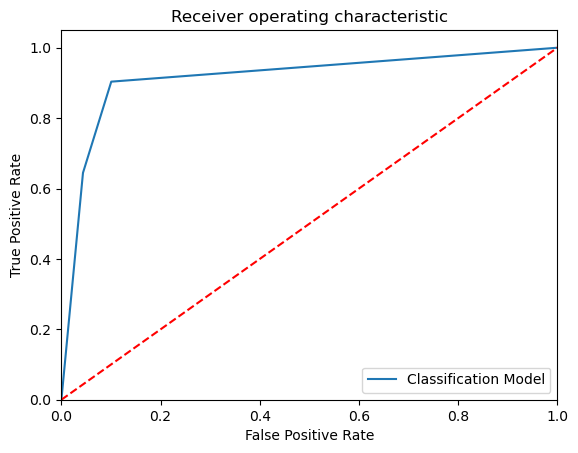

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 113   53]
 [ 106 1227]]
Outcome values : 
 113 53 106 1227
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.68      0.59       166
           0       0.96      0.92      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.74      0.80      0.76      1499
weighted avg       0.91      0.89      0.90      1499

Accuracy : 89.4 %
Precision : 51.6 %
Recall : 68.1 %
F1 Score : 0.587
Specificity or True Negative Rate : 92.0 %
Balanced Accuracy : 80.0 %
MCC : 0.534
roc_auc_score: 0.801


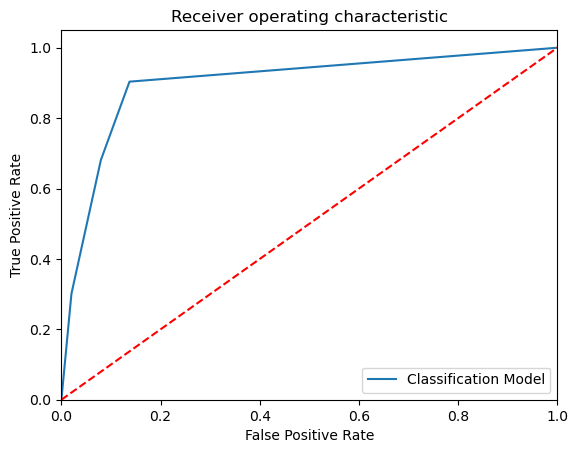

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  69   97]
 [  55 1278]]
Outcome values : 
 69 97 55 1278
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.42      0.48       166
           0       0.93      0.96      0.94      1333

    accuracy                           0.90      1499
   macro avg       0.74      0.69      0.71      1499
weighted avg       0.89      0.90      0.89      1499

Accuracy : 89.9 %
Precision : 55.6 %
Recall : 41.6 %
F1 Score : 0.476
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 68.8 %
MCC : 0.427
roc_auc_score: 0.687


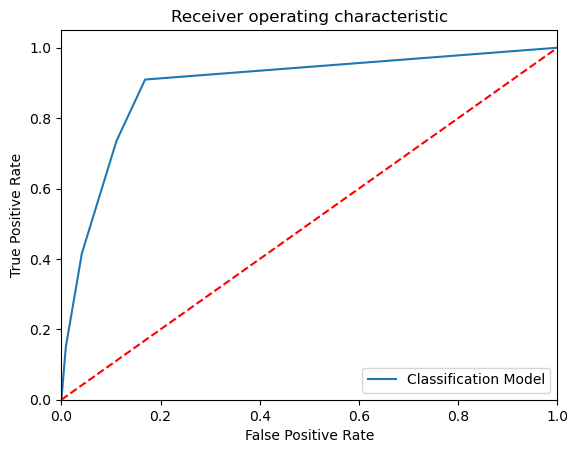

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  86   80]
 [  81 1252]]
Outcome values : 
 86 80 81 1252
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.52      0.52       166
           0       0.94      0.94      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.73      0.73      0.73      1499
weighted avg       0.89      0.89      0.89      1499

Accuracy : 89.3 %
Precision : 51.5 %
Recall : 51.8 %
F1 Score : 0.517
Specificity or True Negative Rate : 93.9 %
Balanced Accuracy : 72.8 %
MCC : 0.456
roc_auc_score: 0.729


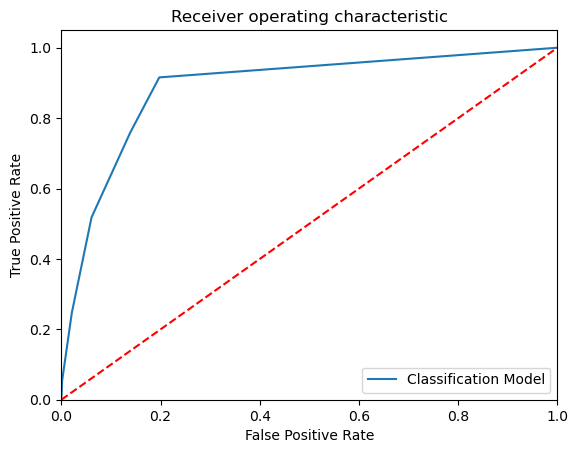

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  53  113]
 [  48 1285]]
Outcome values : 
 53 113 48 1285
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.32      0.40       166
           0       0.92      0.96      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.72      0.64      0.67      1499
weighted avg       0.88      0.89      0.88      1499

Accuracy : 89.3 %
Precision : 52.5 %
Recall : 31.9 %
F1 Score : 0.397
Specificity or True Negative Rate : 96.4 %
Balanced Accuracy : 64.2 %
MCC : 0.355
roc_auc_score: 0.642


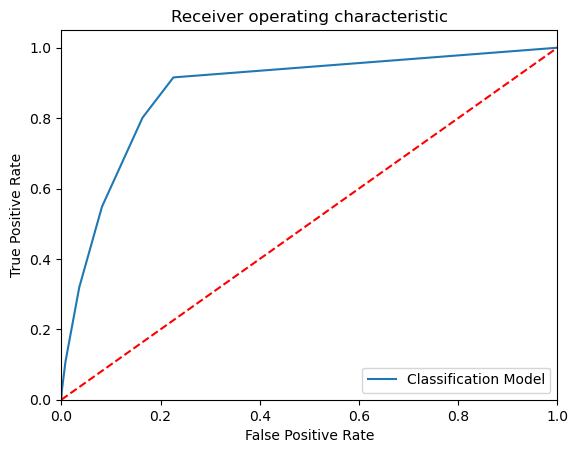

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  62  104]
 [  67 1266]]
Outcome values : 
 62 104 67 1266
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.37      0.42       166
           0       0.92      0.95      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.70      0.66      0.68      1499
weighted avg       0.87      0.89      0.88      1499

Accuracy : 88.6 %
Precision : 48.1 %
Recall : 37.3 %
F1 Score : 0.42
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 66.2 %
MCC : 0.362
roc_auc_score: 0.662


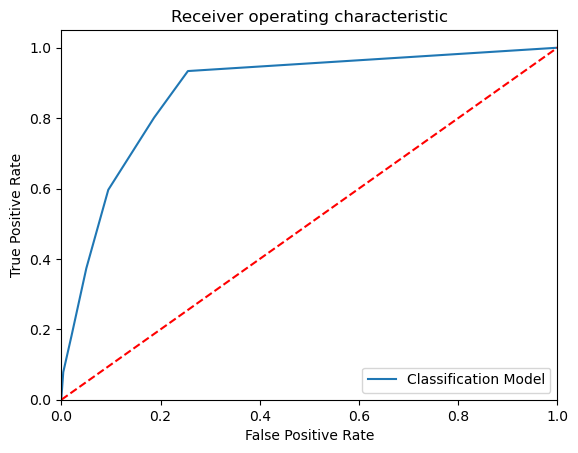

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  41  125]
 [  36 1297]]
Outcome values : 
 41 125 36 1297
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.25      0.34       166
           0       0.91      0.97      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.72      0.61      0.64      1499
weighted avg       0.87      0.89      0.87      1499

Accuracy : 89.3 %
Precision : 53.2 %
Recall : 24.7 %
F1 Score : 0.337
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 61.0 %
MCC : 0.313
roc_auc_score: 0.61


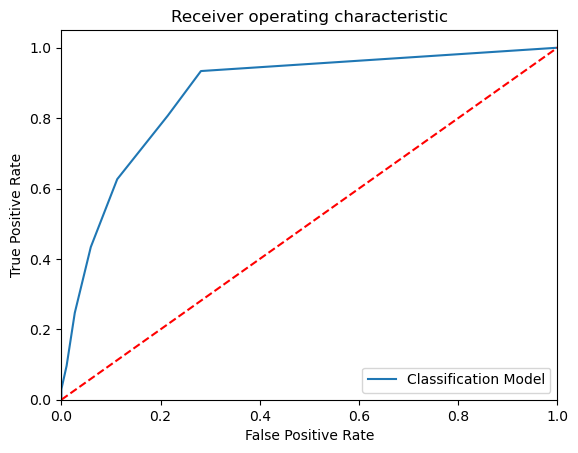

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  55  111]
 [  46 1287]]
Outcome values : 
 55 111 46 1287
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.33      0.41       166
           0       0.92      0.97      0.94      1333

    accuracy                           0.90      1499
   macro avg       0.73      0.65      0.68      1499
weighted avg       0.88      0.90      0.88      1499

Accuracy : 89.5 %
Precision : 54.5 %
Recall : 33.1 %
F1 Score : 0.412
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 64.8 %
MCC : 0.372
roc_auc_score: 0.648


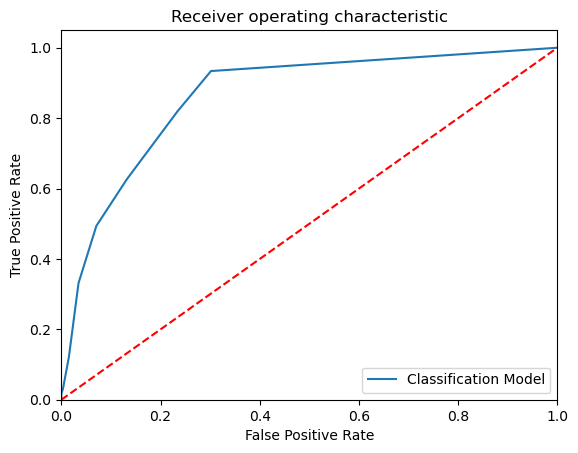

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[  35  131]
 [  30 1303]]
Outcome values : 
 35 131 30 1303
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.21      0.30       166
           0       0.91      0.98      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.72      0.59      0.62      1499
weighted avg       0.87      0.89      0.87      1499

Accuracy : 89.3 %
Precision : 53.8 %
Recall : 21.1 %
F1 Score : 0.303
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 59.4 %
MCC : 0.29
roc_auc_score: 0.594


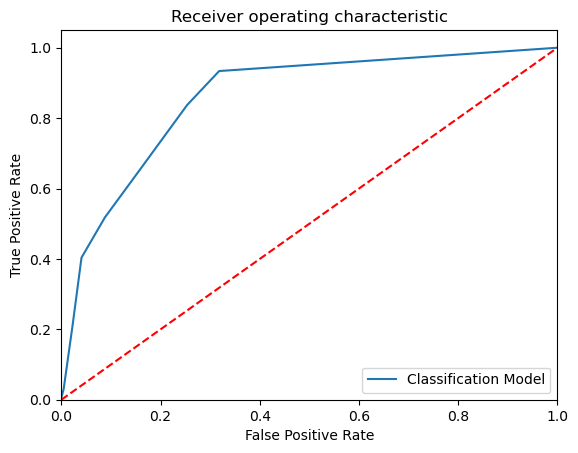

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[  51  115]
 [  36 1297]]
Outcome values : 
 51 115 36 1297
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.31      0.40       166
           0       0.92      0.97      0.94      1333

    accuracy                           0.90      1499
   macro avg       0.75      0.64      0.67      1499
weighted avg       0.88      0.90      0.88      1499

Accuracy : 89.9 %
Precision : 58.6 %
Recall : 30.7 %
F1 Score : 0.403
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 64.0 %
MCC : 0.376
roc_auc_score: 0.64


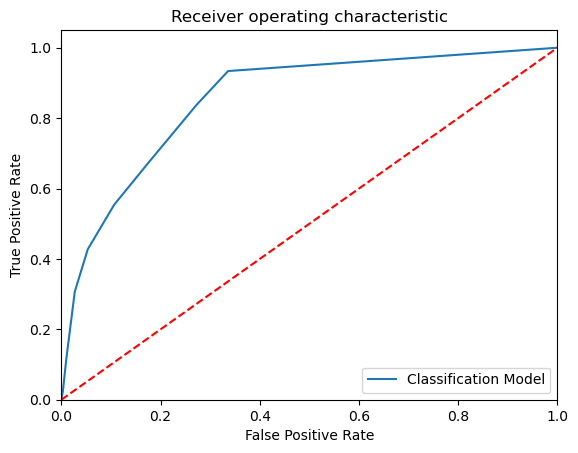

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[  28  138]
 [  15 1318]]
Outcome values : 
 28 138 15 1318
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.17      0.27       166
           0       0.91      0.99      0.95      1333

    accuracy                           0.90      1499
   macro avg       0.78      0.58      0.61      1499
weighted avg       0.88      0.90      0.87      1499

Accuracy : 89.8 %
Precision : 65.1 %
Recall : 16.9 %
F1 Score : 0.268
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 57.9 %
MCC : 0.296
roc_auc_score: 0.579


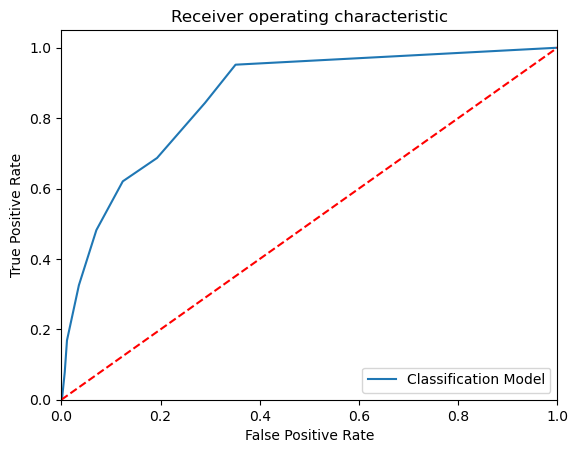

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  29  137]
 [  24 1309]]
Outcome values : 
 29 137 24 1309
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.17      0.26       166
           0       0.91      0.98      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.73      0.58      0.60      1499
weighted avg       0.87      0.89      0.87      1499

Accuracy : 89.3 %
Precision : 54.7 %
Recall : 17.5 %
F1 Score : 0.265
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 57.8 %
MCC : 0.266
roc_auc_score: 0.578


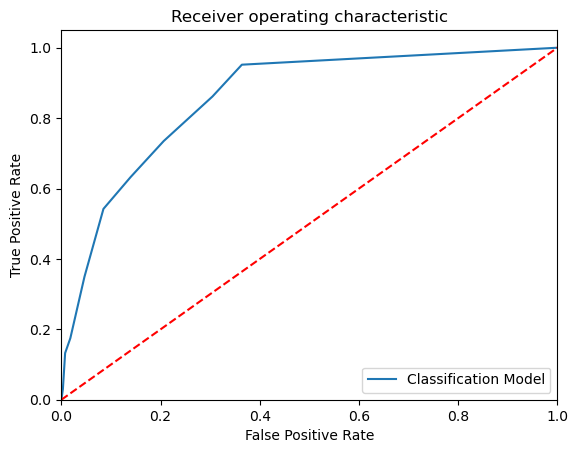

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[  23  143]
 [  16 1317]]
Outcome values : 
 23 143 16 1317
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.14      0.22       166
           0       0.90      0.99      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.75      0.56      0.58      1499
weighted avg       0.87      0.89      0.86      1499

Accuracy : 89.4 %
Precision : 59.0 %
Recall : 13.9 %
F1 Score : 0.224
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 56.4 %
MCC : 0.249
roc_auc_score: 0.563


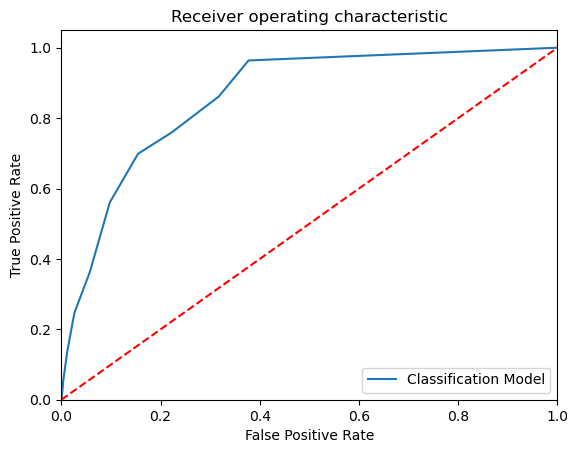

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[  32  134]
 [  22 1311]]
Outcome values : 
 32 134 22 1311
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.19      0.29       166
           0       0.91      0.98      0.94      1333

    accuracy                           0.90      1499
   macro avg       0.75      0.59      0.62      1499
weighted avg       0.87      0.90      0.87      1499

Accuracy : 89.6 %
Precision : 59.3 %
Recall : 19.3 %
F1 Score : 0.291
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 58.8 %
MCC : 0.297
roc_auc_score: 0.588


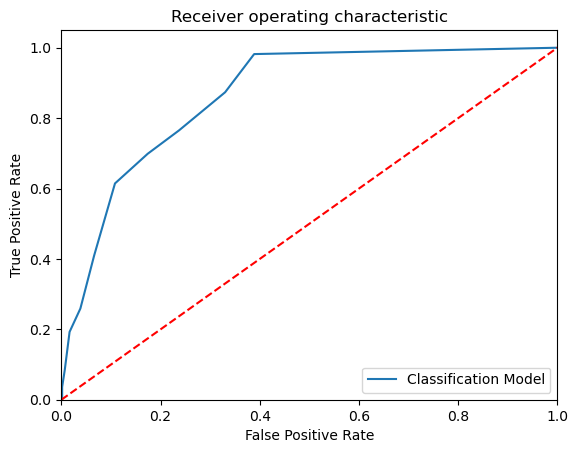

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[  19  147]
 [  14 1319]]
Outcome values : 
 19 147 14 1319
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.11      0.19       166
           0       0.90      0.99      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.74      0.55      0.57      1499
weighted avg       0.86      0.89      0.86      1499

Accuracy : 89.3 %
Precision : 57.6 %
Recall : 11.4 %
F1 Score : 0.191
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 55.2 %
MCC : 0.222
roc_auc_score: 0.552


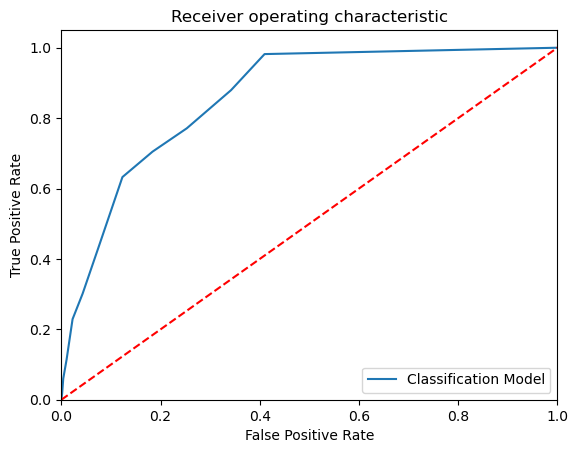

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[  24  142]
 [  19 1314]]
Outcome values : 
 24 142 19 1314
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.14      0.23       166
           0       0.90      0.99      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.73      0.57      0.59      1499
weighted avg       0.86      0.89      0.86      1499

Accuracy : 89.3 %
Precision : 55.8 %
Recall : 14.5 %
F1 Score : 0.23
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 56.6 %
MCC : 0.245
roc_auc_score: 0.565


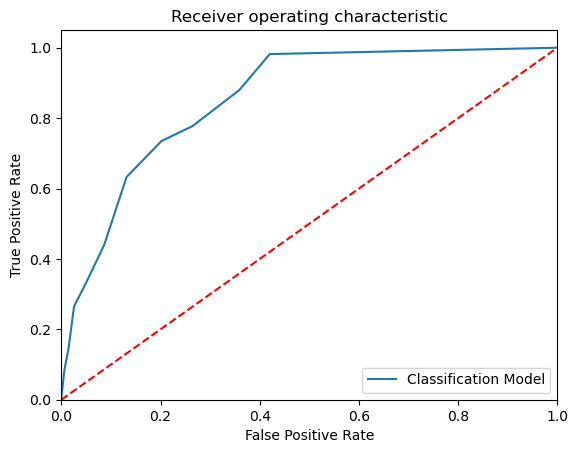

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[  19  147]
 [  13 1320]]
Outcome values : 
 19 147 13 1320
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.11      0.19       166
           0       0.90      0.99      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.75      0.55      0.57      1499
weighted avg       0.87      0.89      0.86      1499

Accuracy : 89.3 %
Precision : 59.4 %
Recall : 11.4 %
F1 Score : 0.192
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 55.2 %
MCC : 0.227
roc_auc_score: 0.552


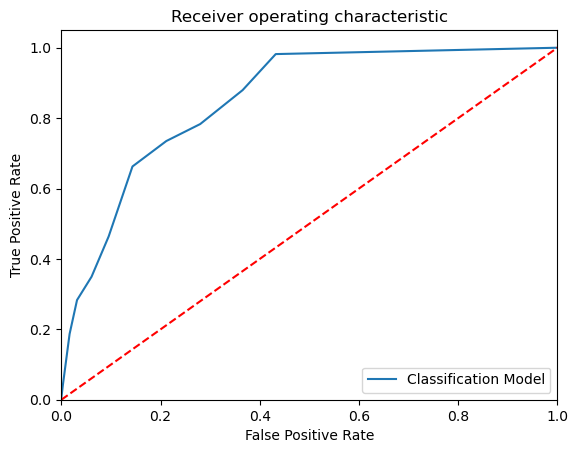

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[  23  143]
 [  15 1318]]
Outcome values : 
 23 143 15 1318
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.14      0.23       166
           0       0.90      0.99      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.75      0.56      0.58      1499
weighted avg       0.87      0.89      0.86      1499

Accuracy : 89.5 %
Precision : 60.5 %
Recall : 13.9 %
F1 Score : 0.225
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 56.4 %
MCC : 0.254
roc_auc_score: 0.564


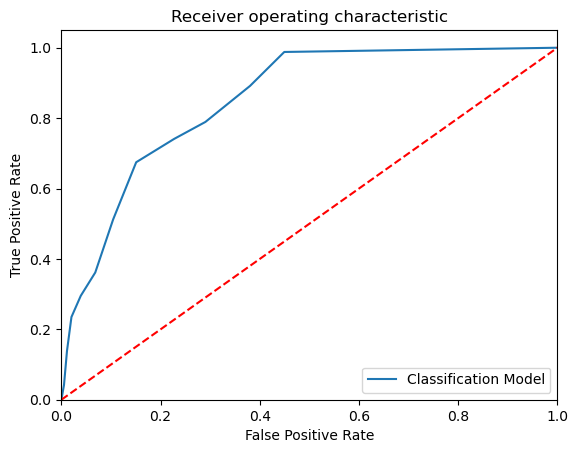

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[   9  157]
 [   9 1324]]
Outcome values : 
 9 157 9 1324
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.05      0.10       166
           0       0.89      0.99      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.70      0.52      0.52      1499
weighted avg       0.85      0.89      0.85      1499

Accuracy : 88.9 %
Precision : 50.0 %
Recall : 5.4 %
F1 Score : 0.098
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 52.4 %
MCC : 0.137
roc_auc_score: 0.524


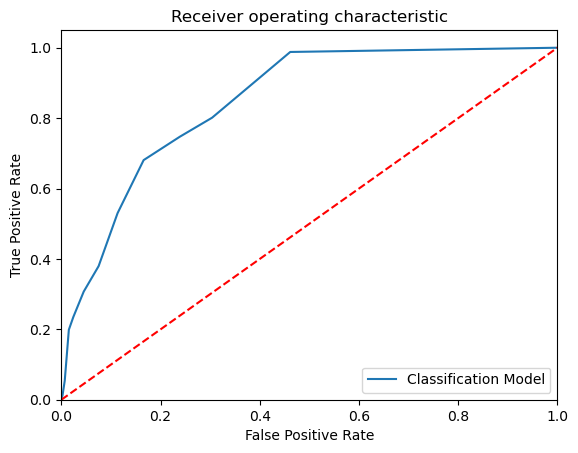

In [28]:
#to find k value for KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [30]:
#display the KNN results
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,148,18,70,1263,0.941,0.679,0.892,0.771,0.947,0.747,0.919527,0.920
1,KNeighborsClassifier(n_neighbors=2),2,90,76,46,1287,0.919,0.662,0.542,0.596,0.965,0.555,0.753830,0.754
2,KNeighborsClassifier(n_neighbors=3),3,99,67,92,1241,0.894,0.518,0.596,0.555,0.931,0.496,0.763684,0.764
3,KNeighborsClassifier(n_neighbors=4),4,68,98,59,1274,0.895,0.535,0.410,0.464,0.956,0.412,0.682689,0.683
4,KNeighborsClassifier(),5,74,92,78,1255,0.887,0.487,0.446,0.465,0.941,0.403,0.693634,0.694
5,KNeighborsClassifier(n_neighbors=6),6,43,123,50,1283,0.885,0.462,0.259,0.332,0.962,0.288,0.610763,0.610
6,KNeighborsClassifier(n_neighbors=7),7,46,120,64,1269,0.877,0.418,0.277,0.333,0.952,0.276,0.614548,0.614
7,KNeighborsClassifier(n_neighbors=8),8,24,142,36,1297,0.881,0.400,0.145,0.212,0.973,0.188,0.558786,0.559
8,KNeighborsClassifier(n_neighbors=9),9,31,135,48,1285,0.878,0.392,0.187,0.253,0.964,0.212,0.575369,0.576
9,KNeighborsClassifier(n_neighbors=10),10,20,146,33,1300,0.881,0.377,0.120,0.183,0.975,0.163,0.547863,0.548


# SVM Algorithm-4 types

In [29]:
#load the results file for SVM
SVM_Results1=pd.read_csv(r"D:\Datasets\EMResults.csv",header=0)
SVM_Results_bk1=SVM_Results1.copy()
SVM_Results1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVM - Linear
Confusion matrix : 
 [[   0  166]
 [   0 1333]]
Outcome values : 
 0 166 0 1333
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       166
           0       0.89      1.00      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.44      0.50      0.47      1499
weighted avg       0.79      0.89      0.84      1499

Accuracy : 88.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


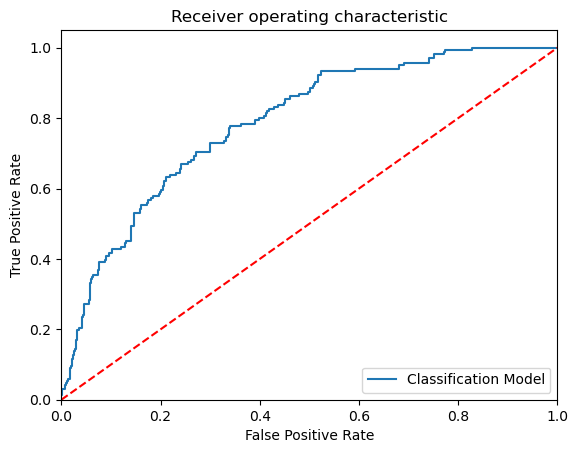

-----------------------------------------------------------------------------------------------------


In [30]:
# Training the SVM algorithm with train dataset
#linear SVM
from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---

new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVM_Results1 = SVM_Results1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[   0  166]
 [   0 1333]]
Outcome values : 
 0 166 0 1333
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       166
           0       0.89      1.00      0.94      1333

    accuracy                           0.89      1499
   macro avg       0.44      0.50      0.47      1499
weighted avg       0.79      0.89      0.84      1499

Accuracy : 88.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


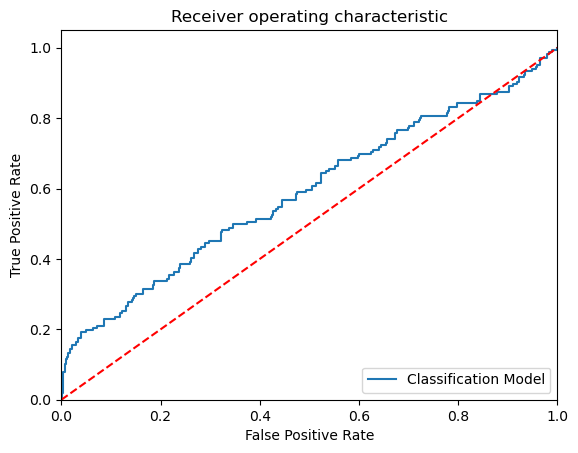

-----------------------------------------------------------------------------------------------------


In [31]:
# Training the SVM algorithm
#polynomial SVM
from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVM_Results1 = SVM_Results1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[139  27]
 [370 963]]
Outcome values : 
 139 27 370 963
Classification report : 
               precision    recall  f1-score   support

           1       0.27      0.84      0.41       166
           0       0.97      0.72      0.83      1333

    accuracy                           0.74      1499
   macro avg       0.62      0.78      0.62      1499
weighted avg       0.90      0.74      0.78      1499

Accuracy : 73.5 %
Precision : 27.3 %
Recall : 83.7 %
F1 Score : 0.412
Specificity or True Negative Rate : 72.2 %
Balanced Accuracy : 78.0 %
MCC : 0.371
roc_auc_score: 0.78


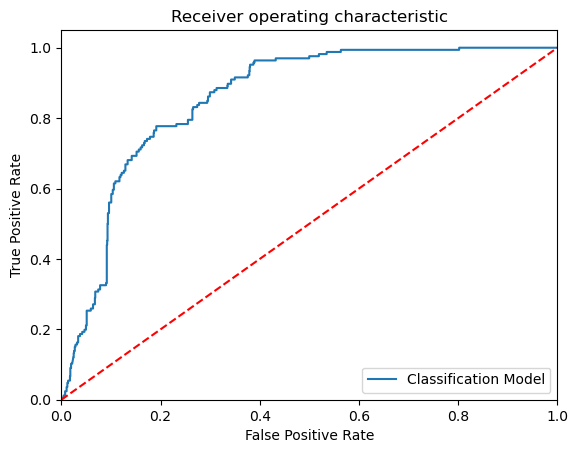

-----------------------------------------------------------------------------------------------------


In [32]:
# Training the SVM algorithm
#Gaussian SVM
from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVM_Results1 = SVM_Results1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 67  99]
 [725 608]]
Outcome values : 
 67 99 725 608
Classification report : 
               precision    recall  f1-score   support

           1       0.08      0.40      0.14       166
           0       0.86      0.46      0.60      1333

    accuracy                           0.45      1499
   macro avg       0.47      0.43      0.37      1499
weighted avg       0.77      0.45      0.55      1499

Accuracy : 45.0 %
Precision : 8.5 %
Recall : 40.4 %
F1 Score : 0.14
Specificity or True Negative Rate : 45.6 %
Balanced Accuracy : 43.0 %
MCC : -0.088
roc_auc_score: 0.43


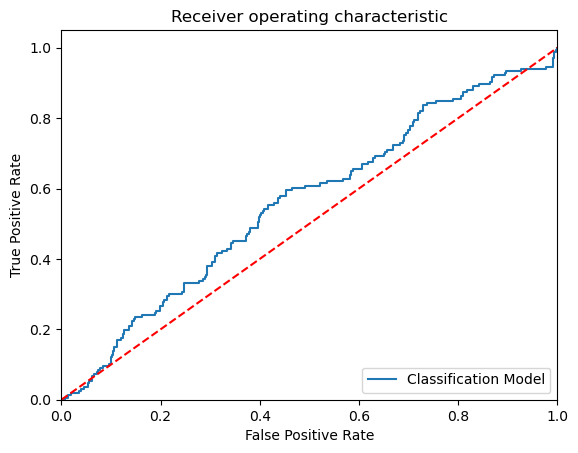

-----------------------------------------------------------------------------------------------------


In [33]:

# Training the SVM algorithm
#Sigmoid SVM
from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVM_Results1 = SVM_Results1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [34]:
#display the SVM results
SVM_Results1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,166,0,1333,0.889,NaN,0.000,0.000,1.000,NaN,0.500000,0.50
1,SVM - Polynominal,0,166,0,1333,0.889,NaN,0.000,0.000,1.000,NaN,0.500000,0.50
2,SVM - Gaussian,139,27,370,963,0.735,0.273,0.837,0.412,0.722,0.371,0.779890,0.78
3,SVM - Sigmoid,67,99,725,608,0.450,0.085,0.404,0.140,0.456,-0.088,0.429864,0.43


In [35]:
#load the results file for comparison of different algorithms
algo_Results1=pd.read_csv(r"D:\Datasets\EMResults.csv",header=0)
algo_Results1_bk=algo_Results1.copy()
algo_Results1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Comparison b/w different algorithms

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  10  156]
 [  18 1315]]
Outcome values : 
 10 156 18 1315
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.06      0.10       166
           0       0.89      0.99      0.94      1333

    accuracy                           0.88      1499
   macro avg       0.63      0.52      0.52      1499
weighted avg       0.83      0.88      0.85      1499

Accuracy : 88.4 %
Precision : 35.7 %
Recall : 6.0 %
F1 Score : 0.103
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 52.3 %
MCC : 0.108
roc_auc_score: 0.523


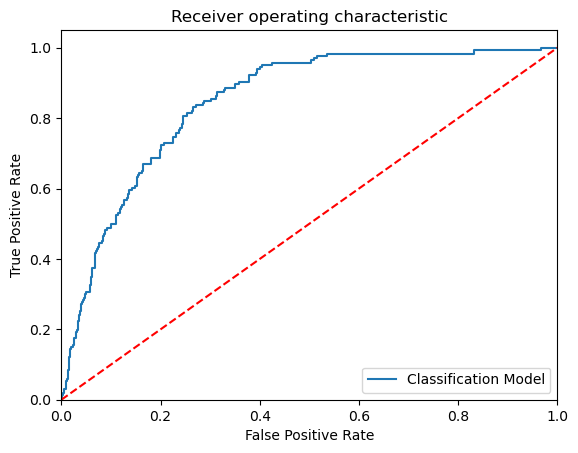

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 133   33]
 [  84 1249]]
Outcome values : 
 133 33 84 1249
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.80      0.69       166
           0       0.97      0.94      0.96      1333

    accuracy                           0.92      1499
   macro avg       0.79      0.87      0.82      1499
weighted avg       0.93      0.92      0.93      1499

Accuracy : 92.2 %
Precision : 61.3 %
Recall : 80.1 %
F1 Score : 0.695
Specificity or True Negative Rate : 93.7 %
Balanced Accuracy : 86.9 %
MCC : 0.658
roc_auc_score: 0.869


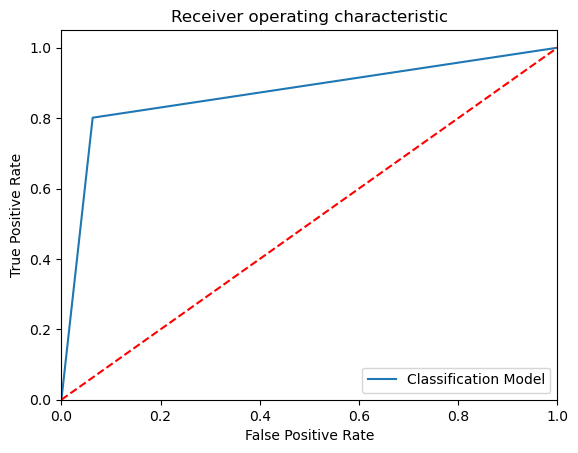

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 142   24]
 [  17 1316]]
Outcome values : 
 142 24 17 1316
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.86      0.87       166
           0       0.98      0.99      0.98      1333

    accuracy                           0.97      1499
   macro avg       0.94      0.92      0.93      1499
weighted avg       0.97      0.97      0.97      1499

Accuracy : 97.3 %
Precision : 89.3 %
Recall : 85.5 %
F1 Score : 0.874
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 92.1 %
MCC : 0.859
roc_auc_score: 0.921


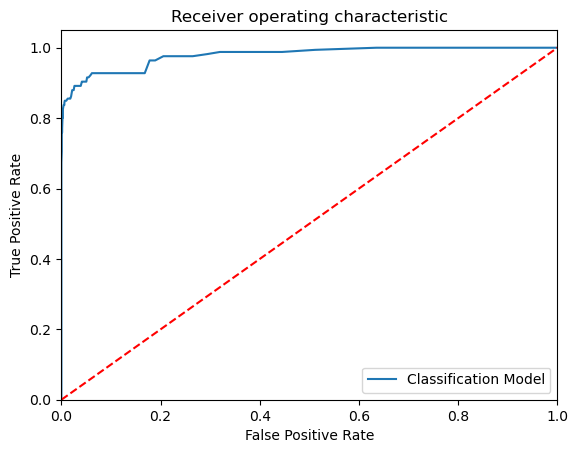

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 147   19]
 [  70 1263]]
Outcome values : 
 147 19 70 1263
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.89      0.77       166
           0       0.99      0.95      0.97      1333

    accuracy                           0.94      1499
   macro avg       0.83      0.92      0.87      1499
weighted avg       0.95      0.94      0.94      1499

Accuracy : 94.1 %
Precision : 67.7 %
Recall : 88.6 %
F1 Score : 0.768
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 91.6 %
MCC : 0.743
roc_auc_score: 0.917


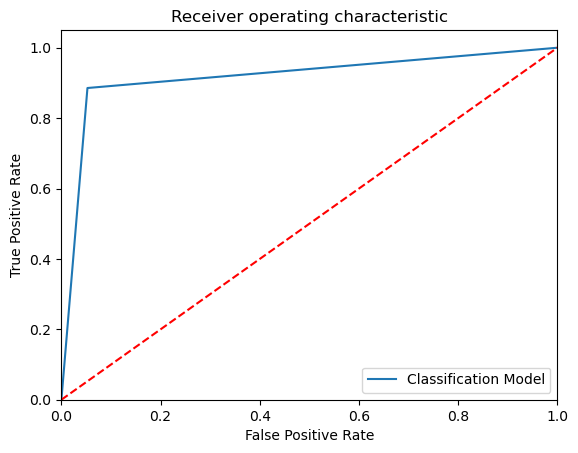

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  79   87]
 [ 154 1179]]
Outcome values : 
 79 87 154 1179
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.48      0.40       166
           0       0.93      0.88      0.91      1333

    accuracy                           0.84      1499
   macro avg       0.64      0.68      0.65      1499
weighted avg       0.87      0.84      0.85      1499

Accuracy : 83.9 %
Precision : 33.9 %
Recall : 47.6 %
F1 Score : 0.396
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 68.0 %
MCC : 0.312
roc_auc_score: 0.68


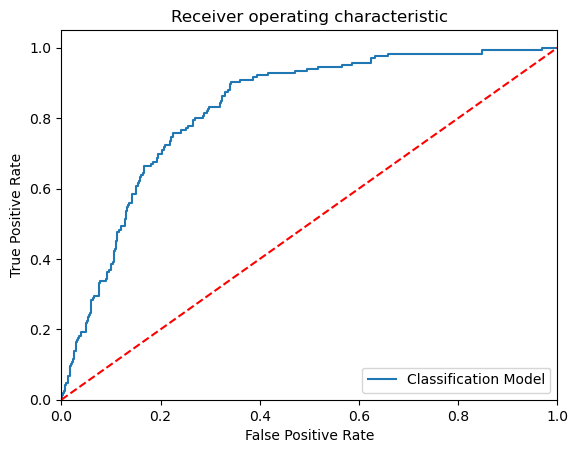

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[139  27]
 [370 963]]
Outcome values : 
 139 27 370 963
Classification report : 
               precision    recall  f1-score   support

           1       0.27      0.84      0.41       166
           0       0.97      0.72      0.83      1333

    accuracy                           0.74      1499
   macro avg       0.62      0.78      0.62      1499
weighted avg       0.90      0.74      0.78      1499

Accuracy : 73.5 %
Precision : 27.3 %
Recall : 83.7 %
F1 Score : 0.412
Specificity or True Negative Rate : 72.2 %
Balanced Accuracy : 78.0 %
MCC : 0.371
roc_auc_score: 0.78


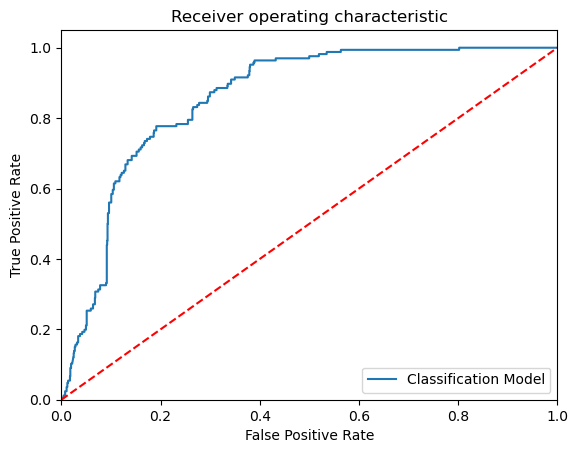

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 145   21]
 [   7 1326]]
Outcome values : 
 145 21 7 1326
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.87      0.91       166
           0       0.98      0.99      0.99      1333

    accuracy                           0.98      1499
   macro avg       0.97      0.93      0.95      1499
weighted avg       0.98      0.98      0.98      1499

Accuracy : 98.1 %
Precision : 95.4 %
Recall : 87.3 %
F1 Score : 0.912
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 93.4 %
MCC : 0.903
roc_auc_score: 0.934


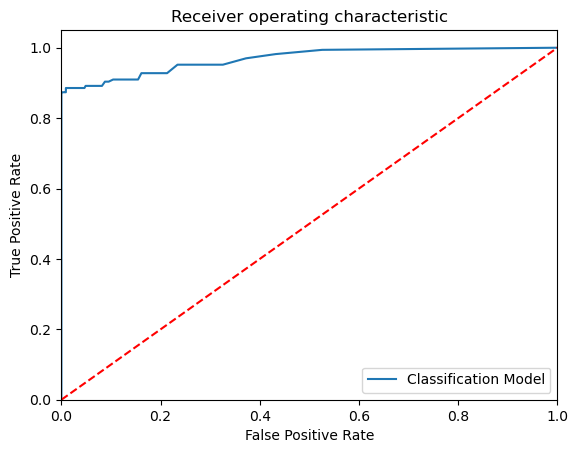

-----------------------------------------------------------------------------------------------------


In [36]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelKNN, ModelGNB,ModelSVM, ModelET]
#MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    algo_Results1 = algo_Results1.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

In [37]:
#display the comparison results
algo_Results1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),10,156,18,1315,0.884,0.357,0.060,0.103,0.986,0.108,0.523369,0.523
1,DecisionTreeClassifier(),133,33,84,1249,0.922,0.613,0.801,0.695,0.937,0.658,0.869095,0.869
2,"(DecisionTreeClassifier(max_features='sqrt', r...",142,24,17,1316,0.973,0.893,0.855,0.874,0.987,0.859,0.921334,0.921
3,KNeighborsClassifier(n_neighbors=1),147,19,70,1263,0.941,0.677,0.886,0.768,0.947,0.743,0.916515,0.916
4,GaussianNB(),79,87,154,1179,0.839,0.339,0.476,0.396,0.884,0.312,0.680187,0.680
5,"SVC(class_weight='balanced', probability=True,...",139,27,370,963,0.735,0.273,0.837,0.412,0.722,0.371,0.779890,0.780
6,"(ExtraTreeClassifier(random_state=1275440182),...",145,21,7,1326,0.981,0.954,0.873,0.912,0.995,0.903,0.934121,0.934


In [38]:
#display the predicted results using efficient algorithm(here,Extra Trees)
Results=pd.DataFrame({'stroke_A':y_test,'stroke_P':y_pred})
ResultsFinal=bsdata_bk1.merge(Results,left_index=True,right_index=True)
ResultsFinal.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_A,stroke_P
2463,1,46.0,1,0,1,0,1,85.62,33.1,1,0,0,0
4639,1,47.0,0,0,1,1,1,106.69,31.2,0,0,1,1
2059,1,54.0,1,0,1,2,0,104.42,37.6,3,0,0,0
2569,0,34.0,0,0,1,1,1,71.37,32.9,2,0,0,0
3105,1,80.0,0,0,1,0,1,148.72,28.7,2,0,0,0


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Perform stratified sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)
# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.9590075512405609
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.00      0.00      0.00        38

    accuracy                           0.96       927
   macro avg       0.48      0.50      0.49       927
weighted avg       0.92      0.96      0.94       927



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Perform simple random sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)
# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.9525350593311759
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       882
           1       0.67      0.04      0.08        45

    accuracy                           0.95       927
   macro avg       0.81      0.52      0.53       927
weighted avg       0.94      0.95      0.93       927



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
# Perform stratified sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
# Create an Extra Trees classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
# Train the classifier on the training data
et_classifier.fit(x_train, y_train)
# Make predictions on the test data
y_pred = et_classifier.predict(x_test)
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.9546925566343042
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.00      0.00      0.00        38

    accuracy                           0.95       927
   macro avg       0.48      0.50      0.49       927
weighted avg       0.92      0.95      0.94       927

